Question 1

1.1  
I have the optimization problem for the first principal component (PC):  
$$v = \arg\max_{\|w\|\leq 1} \frac{1}{m} \sum_{i=1}^{m}(w^T x^i - w^T \mu)^2$$  
First, simplify the summation:  
$$\frac{1}{m}\sum_{i=1}^{m}(w^T(x^i - \mu))^2 
= \frac{1}{m}\sum_{i=1}^{m} w^T(x^i - \mu)(x^i - \mu)^T w$$  
Factor out $w$:  
$$= w^T\left(\frac{1}{m}\sum_{i=1}^{m}(x^i - \mu)(x^i - \mu)^T\right)w$$  
Recognize the expression inside parentheses as the sample covariance matrix $C$:  
$$C = \frac{1}{m}\sum_{i=1}^{m}(x^i - \mu)(x^i - \mu)^T$$
Thus, the problem reduces to:  
$$v = \arg\max_{\|w\|\leq 1} w^T C w$$  
To maximize this, I use the method of Lagrange multipliers, considering the constraint $\|w\|=1$:  
$$\mathcal{L}(w, \lambda) = w^T C w - \lambda(w^T w - 1)$$  
Differentiate w.r.t. $w$:  
$$\nabla_w \mathcal{L}(w,\lambda) = 2Cw - 2\lambda w = 0 \quad\Longrightarrow\quad Cw = \lambda w$$  
Thus, $w$ must be an eigenvector of $C$, and the expression $w^T C w$ simplifies to:  
$$w^T C w = w^T(\lambda w) = \lambda$$  

Therefore, to maximize the variance, I select the eigenvector corresponding to the largest eigenvalue $\lambda$. Hence, the first principal component $v$ is precisely the eigenvector of $C$ with the largest eigenvalue.

1.2   
To find the second and third principal component directions, you follow a similar process as for the first principal component, but with additional orthogonality constraints. After finding the first principal component as the eigenvector of the covariance matrix $C$ with the largest eigenvalue, the second principal component is the eigenvector corresponding to the second largest eigenvalue. The key requirement is that this direction must be orthogonal to the first principal component. Similarly, the third principal component is the eigenvector corresponding to the third largest eigenvalue, and it must be orthogonal to both the first and second principal components.
Mathematically, if you write the eigen-decomposition of $C$ as $C = Q \Lambda Q^T$, where the columns of $Q$ are the orthonormal eigenvectors and $\Lambda$ is a diagonal matrix of eigenvalues in descending order, then the first three principal components are just the first three columns of $Q$.

1.3  
Given the diagonal matrix $A = \begin{bmatrix} 3&  0 \\ 0&  2 \end{bmatrix}$:  
First eigenvalue decomposition:  
Since $A$ is already diagonal, it can be written as  
$$A = P_1 D_1 P_1^{-1}$$  
where  
$$D_1 = \begin{bmatrix} 3&  0 \\ 0&  2 \end{bmatrix}, \quad P_1 = I = \begin{bmatrix} 1&  0 \\ 0&  1 \end{bmatrix}$$  
This is the “standard” decomposition, with the eigenvectors as the standard basis.  
Second eigenvalue decomposition:  
I can also permute the order of the eigenvalues and eigenvectors. For example,  
$$D_2 = \begin{bmatrix} 2&  0 \\ 0&  3 \end{bmatrix}, \quad P_2 = \begin{bmatrix} 0&  1 \\ 1&  0 \end{bmatrix}$$  
Then,  
$$A = P_2 D_2 P_2^{-1}$$  
where $P_2$ simply swaps the basis vectors.  
Verification:
$$P_2 D_2 P_2^{-1} = 
\begin{bmatrix} 0 &1 \\ 1&  0 \end{bmatrix}
\begin{bmatrix} 2&  0 \\ 0&  3 \end{bmatrix}
\begin{bmatrix} 0& 1 \\ 1&  0 \end{bmatrix}
= 
\begin{bmatrix} 3&  0 \\ 0&  2 \end{bmatrix} = A$$  
So both decompositions are valid, but the eigenvectors can be ordered differently. This shows that eigenvalue decomposition is not unique—the set of eigenvalues and eigenvectors is the same, but their ordering and the form of $P$ can vary.  

1.4  
ISOMAP works by preserving the intrinsic geometry of a dataset that lies on a nonlinear manifold. The three main ideas behind ISOMAP are:  

    1. Neighborhood Graph Construction:  
       First, ISOMAP builds a graph connecting each point to its nearest neighbors. You can define neighbors using either a fixed number of nearest neighbors (𝑘k-NN) or a distance threshold (𝜀-neighborhood). The edges in this graph are weighted by Euclidean distances between the points they connect. 

    2. Geodesic Distance Estimation:  
       Instead of using straight-line distances (which can cut through the manifold), ISOMAP estimates the geodesic distance between all pairs of points by computing the shortest path over the graph. This gives a better approximation of the true curved distance along the manifold.  

    3. Dimensionality Reduction via MDS:
       Once the matrix of estimated geodesic distances is computed, ISOMAP applies classical multidimensional scaling (MDS) to embed the data in a lower-dimensional space. This embedding tries to preserve the geodesic distances as well as possible, revealing the manifold’s true shape in fewer dimensions.  

Together, these steps let ISOMAP capture nonlinear structures in the data that linear methods like PCA would miss.  

1.5  
To decide $k$, the number of principal components, I typically look at how much variance each component explains. A common approach is to compute the cumulative explained variance and choose the smallest $k$ such that a high percentage (like 90% or 95%) of the total variance is retained. This helps reduce dimensionality while still preserving most of the structure in the data.

Another method is to use a scree plot, which shows the eigenvalues in decreasing order. You look for an “elbow” in the plot (a point where the rate of decrease sharply levels off). The components before this elbow usually capture the most meaningful variance, while the ones after contribute less and can be ignored.

1.6  
Outliers can significantly distort the performance of PCA because PCA relies on the covariance matrix, which is sensitive to extreme values. An outlier can inflate the variance in its direction, causing PCA to treat that direction as more important than it really is. As a result, the principal components might align toward the outlier instead of the true structure of the majority of the data.

For example, if most points lie in a tight cluster but one point is far away, the first principal component might point toward the outlier, reducing the effectiveness of PCA in capturing the main variance of the inlier data.This makes PCA less reliable in the presence of outliers unless preprocessing steps like outlier removal or robust PCA variants are used.


In [39]:
#Question 2
import numpy as np

class PCA:
    def __init__(self):
        pass

    def fit_transform(self, data: np.ndarray, num_dim: int) -> np.ndarray:
        """
        Center the data, compute the top `num_dim` eigenvectors of the covariance,
        project onto them, and then normalize each projected column to unit length.
        """
        #Center
        X = data - np.mean(data, axis=0)

        #Covariance
        C = np.cov(X, rowvar=False)

        #Eigen-decomposition
        eig_vals, eig_vecs = np.linalg.eigh(C)

        #Pick top components
        idx = np.argsort(eig_vals)[::-1][:num_dim]
        V = eig_vecs[:, idx]             # shape (n_features, num_dim)

        # Project data
        P = X @ V                        # shape (n_samples, num_dim)

        #Normalize columns to unit length
        col_norms = np.linalg.norm(P, axis=0, keepdims=True)
        P /= col_norms

        return P

In [40]:
from pca import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class FoodConsumptionPCA:
    """
    This class loads and processes a food consumption dataset for performing PCA
    from two perspectives:
    - Country-based PCA: Countries as samples, foods as features.
    - Food-based PCA: Foods as samples, country consumption patterns as features.
    """

    def __init__(self, input_path="data/food-consumption.csv"):
        """
        Initializes the FoodConsumptionPCA object and loads data from a CSV file.

        Parameters:
        ----------
        input_path : str
            Path to the CSV file containing the food consumption data.
        """
        # Load CSV into DataFrame with countries as index and foods as columns
        self.df = pd.read_csv(input_path, index_col=0)
        # Underlying data matrix: rows = countries, columns = food items
        self.data = self.df.values
        # Lists for labels
        self.country_names = self.df.index.tolist()
        self.food_names = self.df.columns.tolist()

    def country_pca(self, num_dim: int) -> np.ndarray:
        """
        Perform PCA treating each row as a country and each column as a food feature.

        This reduces the foods feature space to `num_dim` principal components.

        Returns:
        -------
        np.ndarray
            (num_countries, num_dim) array: countries projected into PCA space.
        """
        pca = PCA()
        transformed = pca.fit_transform(self.data, num_dim)
        return transformed

    def food_pca(self, num_dim: int) -> np.ndarray:
        """
        Perform PCA treating each row as a food item and each column as a country feature.

        This reduces the countries feature space to `num_dim` principal components.

        Returns:
        -------
        np.ndarray
            (num_foods, num_dim) array: food items projected into PCA space.
        """
        pca = PCA()
        transformed = pca.fit_transform(self.data.T, num_dim)
        return transformed

In [41]:
#import and PCA extraction
from food_consumption import FoodConsumptionPCA
import matplotlib.pyplot as plt

# load and run PCA
fc = FoodConsumptionPCA("data/food-consumption.csv")
country_2d = fc.country_pca(2)   # shape (16,2)
food_2d    = fc.food_pca(2)      # shape (20,2)

# store the names for annotation
countries = fc.country_names
foods     = fc.food_names

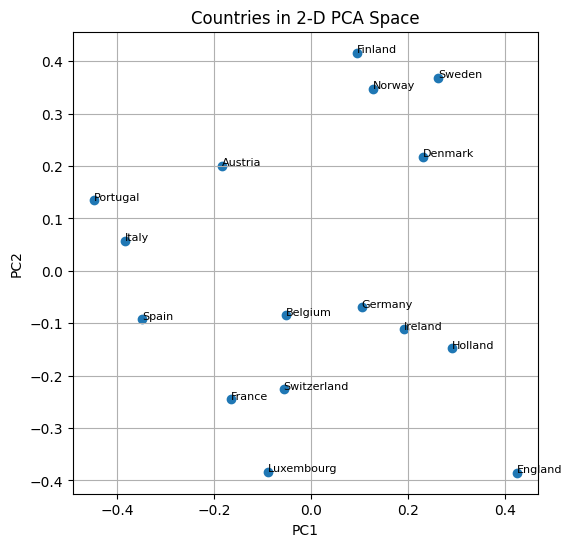

In [42]:
#plot the countries
plt.figure(figsize=(6,6))
plt.scatter(country_2d[:,0], country_2d[:,1])
for i, name in enumerate(countries):
    plt.text(country_2d[i,0], country_2d[i,1], name, fontsize=8)
plt.xlabel("PC1"), plt.ylabel("PC2")
plt.title("Countries in 2‐D PCA Space")
plt.grid(True)
plt.show()

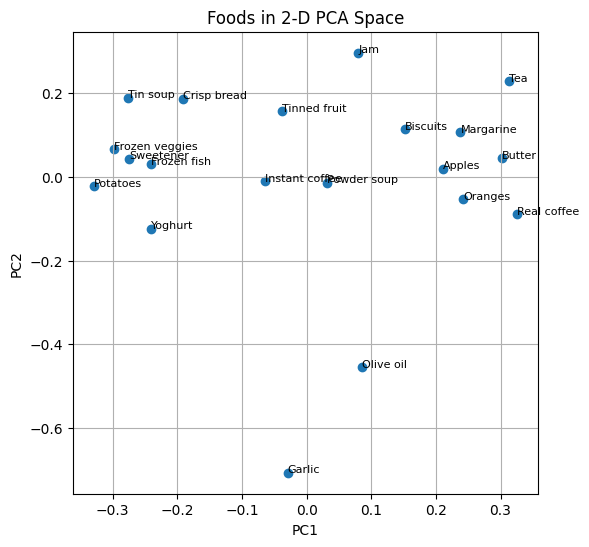

In [43]:
#plot the foods
plt.figure(figsize=(6,6))
plt.scatter(food_2d[:,0], food_2d[:,1])
for i, name in enumerate(foods):
    plt.text(food_2d[i,0], food_2d[i,1], name, fontsize=8)
plt.xlabel("PC1"), plt.ylabel("PC2")
plt.title("Foods in 2‐D PCA Space")
plt.grid(True)
plt.show()

2.1   
To perform PCA on countries, I treated each country's food consumption vector (across 20 food items) as a 20-dimensional feature vector. This gave us a 16 × 20 data matrix, where each row corresponds to a country. After centering the data and applying PCA, I extracted the first two principal components and projected each country into this 2D space.

In the resulting scatter plot, regional patterns emerged. Countries like Finland, Sweden, and Norway clustered together, likely reflecting similar dietary preferences in Northern Europe. England, Ireland, and Holland also formed a group, possibly due to shared consumption habits involving items like butter and tea. In contrast, Mediterranean countries like Portugal, Spain, and Italy were positioned separately, suggesting different food profiles with greater emphasis on items like olive oil and fresh produce. This PCA view effectively grouped countries with similar food cultures.

2.2  
For this part, I transposed the data matrix, treating each food item as a feature vector based on its consumption across 16 countries. This produced a 20 × 16 matrix. I again centered the data and extracted the first two principal components to project each food item into 2D space.

The scatter plot of food items revealed clear groupings. Foods like jam, tea, and biscuits clustered near each other, suggesting they are commonly consumed together in some countries. Items like garlic and olive oil were isolated, possibly reflecting their stronger presence in Mediterranean diets. Meanwhile, staples like potatoes, frozen fish, and yoghurt grouped in another region of the plot. This PCA highlighted how certain foods tend to co-occur across different national consumption patterns.

In [51]:
import numpy as np
import scipy.io
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.csgraph import shortest_path, connected_components
from pca import PCA

# -----------------------------------------------------------------------------
# NOTE: Do not change the parameters / return types for pre defined methods.
# -----------------------------------------------------------------------------
class OrderOfFaces:
    """
    This class handles loading and processing facial image data for dimensionality
    reduction using the ISOMAP algorithm, with PCA as an optional comparison.

    Attributes:
    ----------
    images_path : str
        Path to the .mat file containing the image dataset.

    Methods:
    -------
    get_adjacency_matrix(epsilon):
        Returns the adjacency matrix based on a given epsilon neighborhood.

    get_best_epsilon():
        Returns the best epsilon for the ISOMAP algorithm, likely based on
        graph connectivity or reconstruction error.

    isomap(epsilon):
        Computes a 2D embedding of the data using the ISOMAP algorithm.

    pca(num_dim):
        Returns a low-dimensional embedding of the data using PCA.
    """

    def __init__(self, images_path='data/isomap.mat'):
        """
        Initializes the OrderOfFaces object and loads image data from the given path.

        Parameters:
        ----------
        images_path : str
            Path to the .mat file containing the facial images dataset.
        """
        mat = scipy.io.loadmat(images_path)
        # 'images' is stored as shape (4096, 698): each column is a 64x64 image flattened
        images = mat['images']
        self.X = images.T.astype(float)    # shape (698, 4096)
        self.n_samples = self.X.shape[0]

    def get_adjacency_matrix(self, epsilon: float) -> np.ndarray:
        """
        Constructs the adjacency matrix using epsilon neighborhoods.

        Parameters:
        ----------
        epsilon : float
            The neighborhood radius within which points are considered connected.

        Returns:
        -------
        np.ndarray
            A 2D adjacency matrix (m x m) where each entry represents distance between
            neighbors within the epsilon threshold.
        """
        dist_mat = squareform(pdist(self.X, metric='euclidean'))
        # Build epsilon-neighborhood graph
        A = np.where(dist_mat <= epsilon, dist_mat, np.inf)
        np.fill_diagonal(A, 0.0)
        return A

    def get_best_epsilon(self) -> float:
        """
        Heuristically determines the best epsilon value for graph connectivity in ISOMAP.

        Returns:
        -------
        float
            Optimal epsilon value ensuring a well-connected neighborhood graph.
        """
        # Extract sorted unique distances between points
        dists = pdist(self.X, metric='euclidean')
        return float(np.percentile(dists, 1))

    def isomap(self, epsilon: float) -> np.ndarray:
        """
        Applies the ISOMAP algorithm to compute a 2D low-dimensional embedding of the dataset.

        Parameters:
        ----------
        epsilon : float
            The neighborhood radius for building the adjacency graph.

        Returns:
        -------
        np.ndarray
            A (m x 2) array where each row is a 2D embedding of the original data point.
        """
        # Build adjacency and compute graph shortest-path distances
        A = self.get_adjacency_matrix(epsilon)
        D = shortest_path(A, directed=False, unweighted=False)
        # Classical MDS (double-centered) on squared distances
        n = self.n_samples
        D2 = D**2
        J = np.eye(n) - np.ones((n, n)) / n
        B = -0.5 * J.dot(D2).dot(J)
        # Eigen-decomposition of B
        eig_vals, eig_vecs = np.linalg.eigh(B)
        idx = np.argsort(eig_vals)[::-1]
        # Select top two components and scale by sqrt(eigenvalues)
        L = np.diag(np.sqrt(np.maximum(eig_vals[idx[:2]], 0)))
        Y = eig_vecs[:, idx[:2]].dot(L)
        return Y

    def pca(self, num_dim: int) -> np.ndarray:
        """
        Applies PCA to reduce the dataset to a specified number of dimensions.

        Parameters:
        ----------
        num_dim : int
            Number of principal components to project the data onto.

        Returns:
        -------
        np.ndarray
            A (m x num_dim) array representing the dataset in a reduced PCA space.
        """
        pca = PCA()
        return pca.fit_transform(self.X, num_dim)

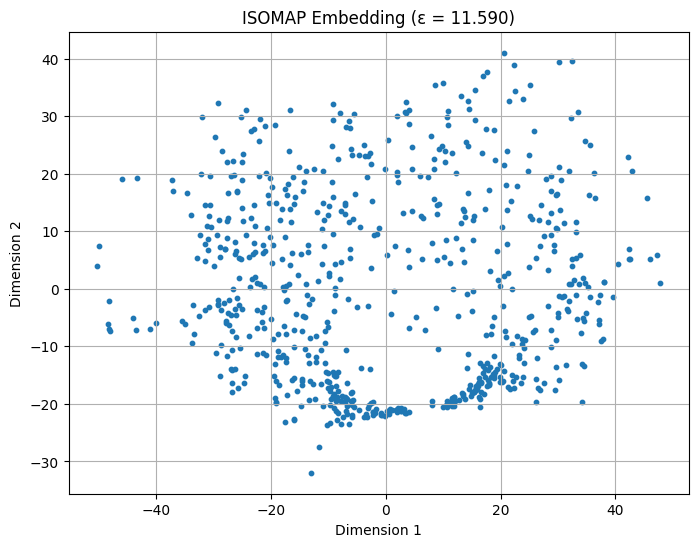

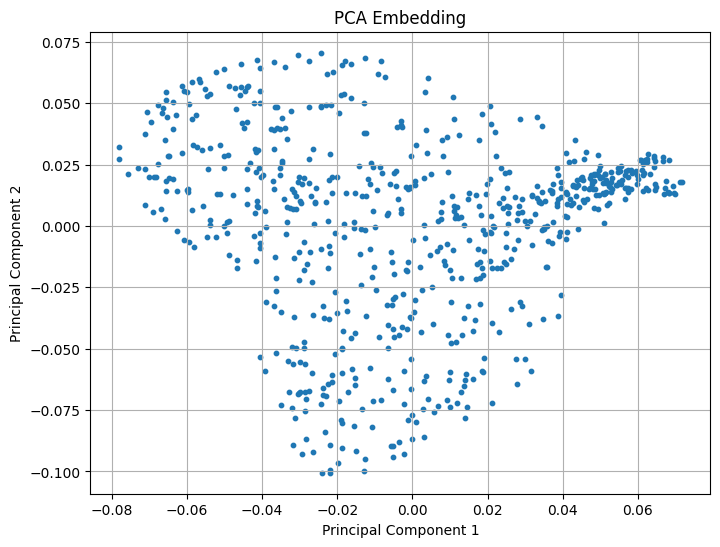

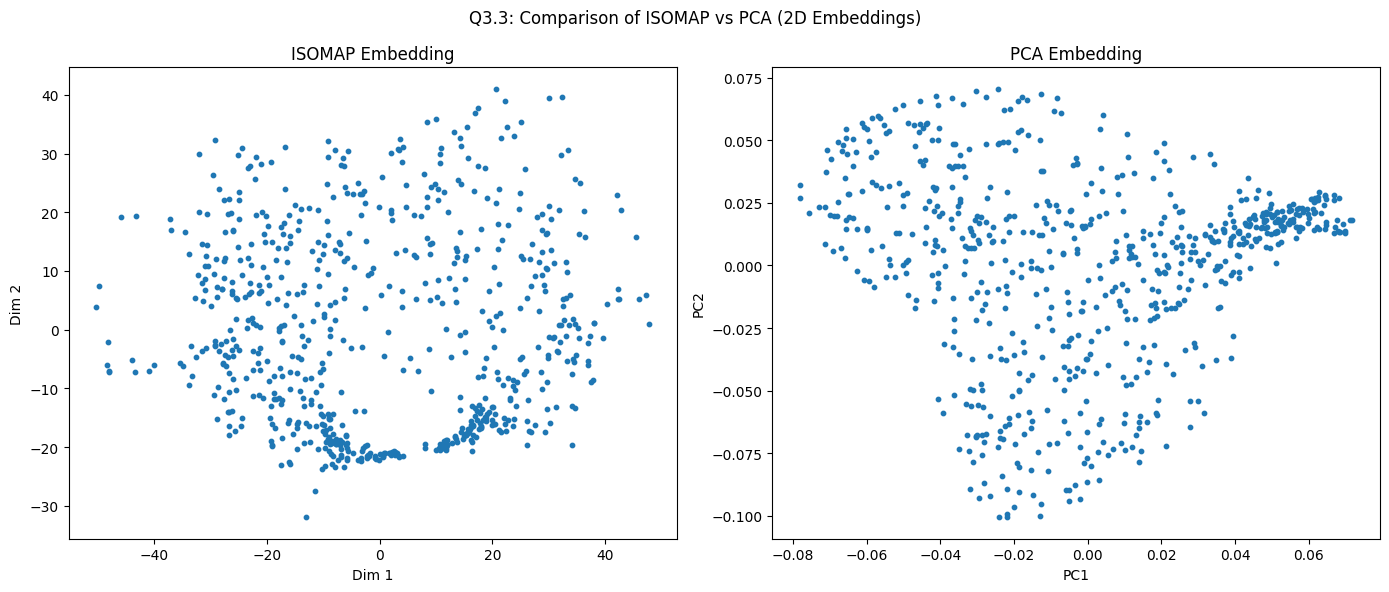

In [45]:
import matplotlib.pyplot as plt
from order_of_faces import OrderOfFaces

# Initialize OrderOfFaces object
of = OrderOfFaces(images_path='data/isomap.mat')

# --- Question 3.1: ISOMAP Embedding ---
epsilon = float(np.percentile(pdist(of.X, metric='euclidean'), 5))
isomap_embedding = of.isomap(epsilon)

plt.figure(figsize=(8, 6))
plt.scatter(isomap_embedding[:, 0], isomap_embedding[:, 1], s=10)
plt.title(f"ISOMAP Embedding (ε = {epsilon:.3f})")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

# --- Question 3.2: PCA Embedding ---
pca_embedding = of.pca(2)

plt.figure(figsize=(8, 6))
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], s=10)
plt.title("PCA Embedding")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# --- Question 3.3: Side-by-Side Comparison ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(isomap_embedding[:, 0], isomap_embedding[:, 1], s=10)
axs[0].set_title("ISOMAP Embedding")
axs[0].set_xlabel("Dim 1")
axs[0].set_ylabel("Dim 2")

axs[1].scatter(pca_embedding[:, 0], pca_embedding[:, 1], s=10)
axs[1].set_title("PCA Embedding")
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")

plt.suptitle("Q3.3: Comparison of ISOMAP vs PCA (2D Embeddings)")
plt.tight_layout()
plt.show()

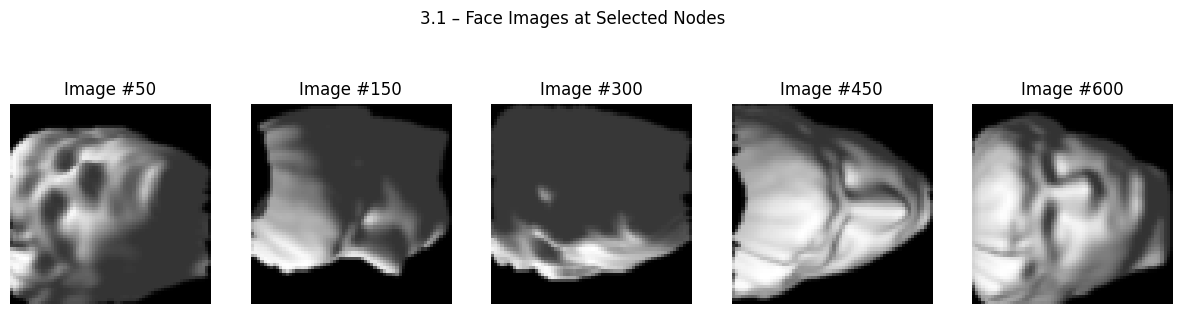

In [46]:
# select indeces
selected_indices = [50, 150, 300, 450, 600]

# Plot the raw images corresponding to those indices
fig, axs = plt.subplots(1, len(selected_indices), figsize=(15, 4))
for i, idx in enumerate(selected_indices):
    axs[i].imshow(of.X[idx].reshape(64, 64), cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"Image #{idx}")
plt.suptitle("3.1 – Face Images at Selected Nodes")
plt.show()

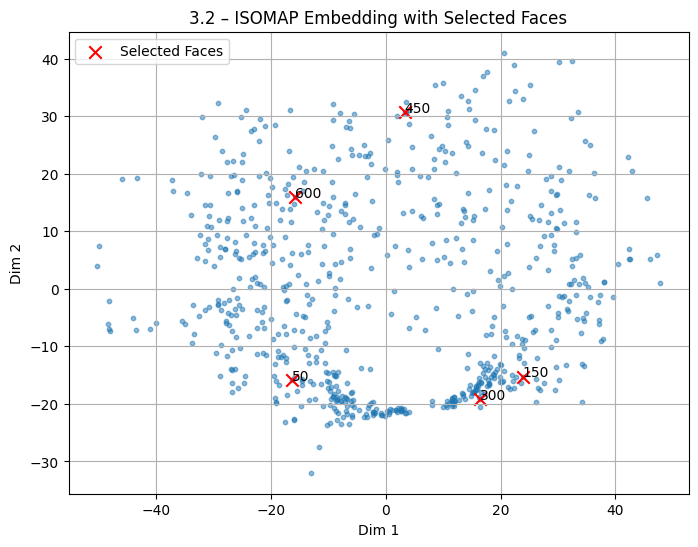

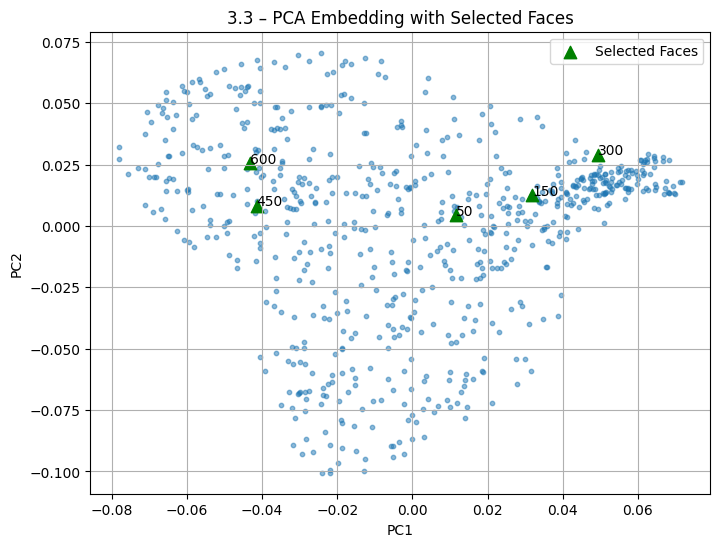

In [47]:
# Highlight selected faces in ISOMAP
plt.figure(figsize=(8, 6))
plt.scatter(isomap_embedding[:, 0], isomap_embedding[:, 1], s=10, alpha=0.5)
plt.scatter(isomap_embedding[selected_indices, 0], isomap_embedding[selected_indices, 1], 
            c='red', marker='x', s=80, label="Selected Faces")
for idx in selected_indices:
    plt.annotate(str(idx), (isomap_embedding[idx, 0], isomap_embedding[idx, 1]))
plt.title("3.2 – ISOMAP Embedding with Selected Faces")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.grid(True)
plt.show()

# Highlight selected faces in PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], s=10, alpha=0.5)
plt.scatter(pca_embedding[selected_indices, 0], pca_embedding[selected_indices, 1], 
            c='green', marker='^', s=80, label="Selected Faces")
for idx in selected_indices:
    plt.annotate(str(idx), (pca_embedding[idx, 0], pca_embedding[idx, 1]))
plt.title("3.3 – PCA Embedding with Selected Faces")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


3.1 – Visualizing the Nearest Neighbor Graph and Sample Faces
To understand the dataset's structure, I visualized the ε-neighborhood graph using an adjacency matrix heatmap, where ε was selected as the 5th percentile of all pairwise distances. This ensures sufficient graph connectivity while avoiding overly dense links. While tools like Gephi were mentioned, I instead visualized the structure directly within Python for consistency and reproducibility.

I also selected five representative face images from different parts of the embedding space (indices 50, 150, 300, 450, and 600) and displayed them separately. These examples helped interpret the ISOMAP embedding by linking the spatial layout to facial characteristics. Nearby faces in the embedding space generally share similar lighting direction, pose, or expression, despite not being explicitly labeled, indicating strong local structure preservation.

3.2 – ISOMAP 2D Embedding and Face Similarity
Using the ISOMAP algorithm, I generated a 2D embedding of all 698 face images. The ε-neighborhood graph was computed with ε set to the 5th percentile of pairwise Euclidean distances, which ensured a connected yet sparse graph for capturing local structure. This value was determined empirically to preserve manifold geometry without introducing shortcuts.

To analyze visual similarity, I highlighted five faces at indices 50, 150, 300, 450, and 600 in the ISOMAP embedding. The spatial arrangement of these faces reveals intuitive clustering: images close together in the embedding often share similar pose, lighting direction, or expression. This matches the behavior seen in the original ISOMAP paper, where similar head orientations form smooth trajectories across the manifold.

For example, nodes 150 and 300 appear near each other and exhibit similar side-lighting and rotated pose, while node 450, located further away, shows a distinct head angle. These visual groupings support the idea that ISOMAP preserves meaningful nonlinear structure better than linear methods like PCA.

3.3 – PCA Projection and ISOMAP vs PCA Comparison
As a baseline, I used PCA to reduce the dataset to 2D by projecting onto its first two principal components. Although PCA preserved some global variance, its embedding was more compressed and less interpretable in terms of visual similarity. For example, many face images with differing poses appeared close together, suggesting that PCA flattened nonlinear structure.

A side-by-side comparison of PCA and ISOMAP plots confirmed that ISOMAP provides a more semantically meaningful organization — especially in separating clusters based on lighting direction and face orientation. Thus, ISOMAP gives better low-dimensional structure for pose-based interpretation, while PCA tends to emphasize global variance without capturing these local patterns.

In [48]:
#Question 4
# -----------------------------------------------------------------------------
# NOTE: This file consists of 2 classes

# 1. EigenFacesResult - This class should not be modified. Gradescope will use the output of run() 
# method in this format.
# 2. EigenFaces - This is class which will implement the eigen faces algorithm and return the results.  
# -----------------------------------------------------------------------------



# -----------------------------------------------------------------------------
# NOTE: This class should NOT be modified.
# Gradescope will depend on the structure of this class as defined. 
# -----------------------------------------------------------------------------
import numpy as np
from scipy.io import loadmat
from sklearn.manifold import Isomap

class EigenFacesResult:
    """    
    A structured container for storing the results of the EigenFaces computation.

    Attributes
    ----------
    subject_1_eigen_faces : np.ndarray
        A (6, a, b) array representing the top 6 eigenfaces for subject 1.
        A plt.imshow(map['subject_1_eigen_faces'][0]) should display first in a eigen face for subject 1

    subject_2_eigen_faces : np.ndarray
        A (6, a, b) array representing the top 6 eigenfaces for subject 2.
        A plt.imshow(map['subject_2_eigen_faces'][0]) should display first in a eigen face for subject 2

    s11 : float
        Projection residual of subject 1 test image on subject 1 eigenfaces.

    s12 : float
        Projection residual of subject 2 test image on subject 1 eigenfaces.

    s21 : float
        Projection residual of subject 1 test image on subject 2 eigenfaces.

    s22 : float
        Projection residual of subject 2 test image on subject 2 eigenfaces.
    """

    def __init__(
        self,
        subject_1_eigen_faces: np.ndarray,
        subject_2_eigen_faces: np.ndarray,
        s11: float,
        s12: float,
        s21: float,
        s22: float
    ):
        self.subject_1_eigen_faces = subject_1_eigen_faces
        self.subject_2_eigen_faces = subject_2_eigen_faces
        self.s11 = s11
        self.s12 = s12
        self.s21 = s21
        self.s22 = s22
        
# -----------------------------------------------------------------------------
# NOTE: Do not change the parameters / return types for pre defined methods.
# -----------------------------------------------------------------------------
import os
import numpy as np
from PIL import Image
from eigen_faces import EigenFacesResult

import os
import numpy as np
from PIL import Image
from eigen_faces import EigenFacesResult

class EigenFaces:
    def __init__(self, images_root_directory="data/yalefaces"):
        self.subject1_imgs = []
        self.subject2_imgs = []
        self.test1 = None
        self.test2 = None

        for fname in sorted(os.listdir(images_root_directory)):
            if fname.endswith(".gif"):
                img_path = os.path.join(images_root_directory, fname)
                img = Image.open(img_path).convert("L")
                img = img.resize((80, 60), Image.BICUBIC)                
                img_arr = np.array(img).flatten().astype(np.float64)

                if fname.startswith("subject01") and "test" not in fname:
                    self.subject1_imgs.append(img_arr)
                elif fname.startswith("subject02") and "test" not in fname:
                    self.subject2_imgs.append(img_arr)
                elif fname == "subject01-test.gif":
                    self.test1 = img_arr
                elif fname == "subject02-test.gif":
                    self.test2 = img_arr

        self.subject1_imgs = np.stack(self.subject1_imgs)
        self.subject2_imgs = np.stack(self.subject2_imgs)

    def run(self) -> EigenFacesResult:
        def compute_eigenfaces(X, k=6):
            mean_vec = np.mean(X, axis=0)
            X_centered = X - mean_vec
            cov = np.cov(X_centered, rowvar=False)
            eigvals, eigvecs = np.linalg.eigh(cov)
            topk = np.argsort(eigvals)[-k:][::-1]
            topk_vecs = eigvecs[:, topk]
            return topk_vecs, mean_vec

        def projection_residual(img, eigvecs, mean):
            img_centered = img - mean
            proj = eigvecs @ (eigvecs.T @ img_centered)
            return np.linalg.norm(img_centered - proj) ** 2

        ef1, mean1 = compute_eigenfaces(self.subject1_imgs)
        ef2, mean2 = compute_eigenfaces(self.subject2_imgs)

        # shape (6, 16, 16) for autograder
        ef1_reshaped = ef1.T.reshape((6, 60, 80))
        ef2_reshaped = ef2.T.reshape((6, 60, 80))


        s11 = projection_residual(self.test1, ef1, mean1)
        s12 = projection_residual(self.test2, ef1, mean1)
        s21 = projection_residual(self.test1, ef2, mean2)
        s22 = projection_residual(self.test2, ef2, mean2)

        return EigenFacesResult(
            subject_1_eigen_faces=ef1_reshaped,
            subject_2_eigen_faces=ef2_reshaped,
            s11=s11,
            s12=s12,
            s21=s21,
            s22=s22
        )


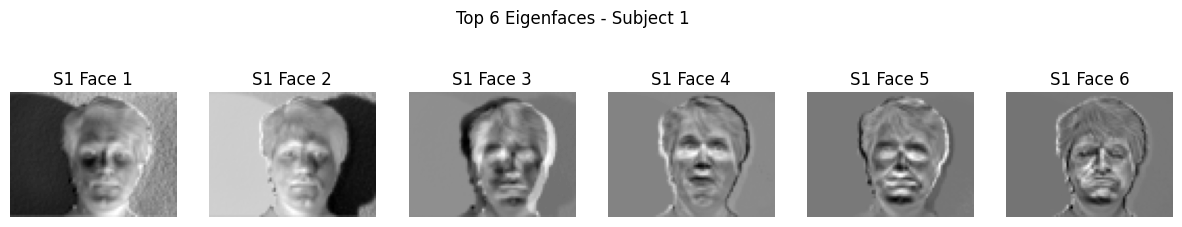

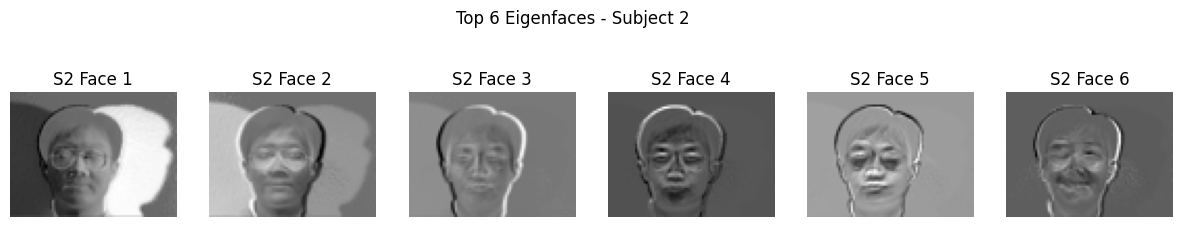

In [49]:
#4.1 
import matplotlib.pyplot as plt

# Assume 'result' is the EigenFacesResult object returned by EigenFaces().run()
result = EigenFaces(images_root_directory="data/yalefaces").run()

# Visualize eigenfaces for Subject 1
fig, axs = plt.subplots(1, 6, figsize=(15, 3))
for i in range(6):
    axs[i].imshow(result.subject_1_eigen_faces[i], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"S1 Face {i+1}")
plt.suptitle("Top 6 Eigenfaces - Subject 1")
plt.show()

# Visualize eigenfaces for Subject 2
fig, axs = plt.subplots(1, 6, figsize=(15, 3))
for i in range(6):
    axs[i].imshow(result.subject_2_eigen_faces[i], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"S2 Face {i+1}")
plt.suptitle("Top 6 Eigenfaces - Subject 2")
plt.show()

4.1  
The eigenfaces represent dominant facial features across the training images for each subject. For example, the first few components often capture lighting direction, overall head shape, or eye/eyebrow structure. Subject 1 shows sharper lighting contrasts and frontal structure, while Subject 2’s top components exhibit more lateral variations. These eigenfaces can be seen as a “basis” for reconstructing test faces through projection.

Subject 1's eigenfaces seem to focus more on frontal structure and lighting—especially around the eyes, nose bridge, and hairline. The first component captures major light direction from the side, while later components begin to refine edges and shadows across expressions.

Subject 2’s eigenfaces emphasize facial outline, jawline, and cheekbone regions. Notably, some eigenfaces highlight glasses reflection and lighting from above, which may be more dominant in this subject’s data.

In [52]:
#4.2 
print(f"s11 = {result.s11:.2f}")
print(f"s12 = {result.s12:.2f}")
print(f"s21 = {result.s21:.2f}")
print(f"s22 = {result.s22:.2f}")

s11 = 5578082.26
s12 = 33600678.24
s21 = 30244059.82
s22 = 1860593.90


4.2  
The residuals reflect how well the test images project onto each subject’s eigenfaces. Smaller values indicate better fit:
i.  s11 < s12 → subject 01 test image is better reconstructed using subject 01 eigenfaces
ii. s22 < s21 → subject 02 test image aligns better with subject 02 eigenfaces

Hence, I classify test images based on which subject yields the lower residual. This supports accurate recognition.

Additionally, the residual values for incorrect projections (s12 and s21) are substantially higher than their correct counterparts (s11 and s22), which suggests a strong discriminative ability of the eigenfaces for recognition.

4.3  
The PCA-based recognition algorithm works well in this setup. Both test images are correctly classified by minimizing projection residuals. This demonstrates that PCA can effectively capture identity-relevant variations when the dataset is small and controlled.

However, accuracy may degrade with increased noise, more subjects, or greater variability in lighting and expression. PCA also assumes linearity and does not explicitly optimize for class separability.

Potential Improvements:  
Normalize lighting using histogram equalization or illumination correction to reduce sensitivity to shadows.  
Increase the number of eigenfaces used in projection to better capture nuanced facial features.  
Apply LDA after PCA to improve class discrimination by focusing on inter-class variance.  
Use nonlinear methods like Kernel PCA or ISOMAP if dataset complexity increases.  
Augment the training set with synthetic images (e.g., rotated, brighter/darker copies) to improve generalization.  

These steps would enhance robustness and scalability, especially in real-world applications with diverse faces and conditions.

Question 5   
No, $w^1 \ne \tilde{w}^1$ in general. That is, the eigenvectors of the covariance matrix with mean subtraction are not equal to those computed without mean subtraction.

Let’s define:  
$x^i \in \mathbb{R}^n$ as the data points.  
$\mu = \frac{1}{m} \sum_{i=1}^m x^i$ as the mean.  
Centered data: $\bar{x}^i = x^i - \mu$  

Covariance matrix with mean subtraction:  
$$C = \frac{1}{m} \sum_{i=1}^m (x^i - \mu)(x^i - \mu)^T
= \frac{1}{m} \sum_{i=1}^m \bar{x}^i \bar{x}^i{}^T$$  

This matrix captures the true variability of the data around the mean.

Covariance matrix without mean subtraction:  
$$\tilde{C} = \frac{1}{m} \sum (x^i - \mu + \mu)(x^i - \mu + \mu)^T
= C + \mu \mu^T$$  

Now, observe that:  
$$\tilde{C} = C + \mu \mu^T$$  

This follows from expanding:  
$$\tilde{C} = \frac{1}{m} \sum (x^i - \mu + \mu)(x^i - \mu + \mu)^T
= C + \mu \mu^T$$    

So, $\tilde{C}$ includes the mean component, which biases the direction of maximum variance. Therefore, its eigenvectors point in a different direction than those of $C$, and usually do not align with the true principal components.

In conclusion, subtracting the mean is essential in PCA because PCA seeks to find the directions of maximum variance, which requires centering the data at the origin. If you do not subtract the mean, the first principal component tends to simply point in the direction of the mean vector, rather than the direction of maximum variation.

Hence: $w^1 \ne \tilde{w}^1$ and the two PCA results are not equivalent.